## Machine Learning ##

Question: Is form an efficient predictor of future performance in football when predicting fantasy league returns?

The intended outcome for this machine learning process is to see whether predictions for expected points are accurate predictors of player's performances and fantasy league returns. 
- The model will therefore be a regression model as looking to predict expected points. 
- The features will be all variables constructed that do not include the current gameweeks stats
- The target variable will be total points

The models that will be considered are as follows:
- Baseline Model
> Mean
- Linear Regression
> Based on EDA so far it would suggest there is a linear relationship with a portion of the variables and is a good place to start for a simple model. High interpretability of results will be useful to demonstrate how useful the new form variables are.
- Ridge Regression
> Regularization to review whether improves performance. The high dimensionality of the data would suggest this could be beneficial.
> The model will be tuned via grid search cross validation.
- Decision Tree
> A number of variables within the model have a large impact on which variables are more important such as a players position or the quality of the team played for. A decision tree regression may capture this better and also offers clear interpretation. This model may also estimate non-linear variables clearer.
> The model will be tuned via grid search cross-validation.
- Random Forest
> Model will be extended to a Random Forest to see if improves accuracy.
> The model will be tuned via grid search cross-validation.

I will consider the following further preprocessing:
- Standardization
> The EDA highlighted that data is relatively standardized already but I will consider this within the analysis to see if improves.
- PCA
> Dataset has a lot of variables with potentially limited impact on the model predictions. I will consider PCA to reduce this dimensionalty.
- Positional feature space 
> A players position has a large impact in the way the player achieves points. Subsetting the dataset based on positions could create a clearer dataset for predictions.

Performance evaluation:
- MAE
- R^2

**Linear Regression**

Expectations:
- Linear Regression
> Recognises the basic patterns in the more useful "form" variables but a lot of other variables will be reduced to noise. Goals, Assists and Clean Sheets produce the highest points scored and from this model it would be logical to assume the rolling form of these variables would carry a high weight.

In [1]:
# import libraries
import pandas as pd
import numpy as np

# import created players
df = pd.read_csv("players_complete_encoded.csv")

# display all columns
pd.set_option('display.max_columns', None)

#view data
df.head()

,round,player_name_id_x,date,total_points,assists,bonus,clean_sheets,goals_conceded,goals_scored,minutes,own_goals,red_cards,yellow_cards,shots,xG,xA,key_passes,xGChain,xGBuildup,conceded,xG_team,xGA,scored,missed,pts,conceded_team,rolling_team_pts,diff_team_xG,diff_team_xGA,diff_team_scored,diff_team_missed,diff_team_conceded,diff_team_pts,attack_overall,defence_overall,attack_difficulty,defence_difficulty,opposition_attack_difficulty,opposition_defence_difficulty,cum_assists,cum_bonus,cum_clean_sheets,cum_goals_conceded,cum_goals_scored,cum_minutes,cum_own_goals,cum_red_cards,cum_yellow_cards,cum_shots,cum_xG,cum_xA,cum_key_passes,cum_xGChain,cum_xGBuildup,cum_conceded,rolling_assists,rolling_bonus,rolling_clean_sheets,rolling_goals_conceded,rolling_goals_scored,rolling_minutes,rolling_shots,rolling_xG,rolling_xA,rolling_key_passes,rolling_xGChain,rolling_xGBuildup,rolling_conceded,diff_assists,diff_bonus,diff_clean_sheets,diff_goals_conceded,diff_goals_scored,diff_minutes,diff_shots,diff_xG,diff_xA,diff_key_passes,diff_xGChain,diff_xGBuildup,diff_conceded,team_name_Arsenal,team_name_Aston Villa,team_name_Brentford,team_name_Brighton,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leeds,team_name_Leicester,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Southampton,team_name_Tottenham,team_name_Watford,team_name_West Ham,team_name_Wolverhampton Wanderers,position_def,position_fwd,position_mid,h_a_a,h_a_h,opponent_team_Arsenal,opponent_team_Aston Villa,opponent_team_Brentford,opponent_team_Brighton,opponent_team_Burnley,opponent_team_Chelsea,opponent_team_Crystal Palace,opponent_team_Everton,opponent_team_Leeds,opponent_team_Leicester,opponent_team_Liverpool,opponent_team_Manchester City,opponent_team_Manchester United,opponent_team_Newcastle United,opponent_team_Norwich,opponent_team_Southampton,opponent_team_Tottenham,opponent_team_Watford,opponent_team_West Ham,opponent_team_Wolverhampton Wanderers,penalty_taker_no,penalty_taker_yes
0,7,Aaron_Cresswell_411,2021-10-03,1.0,0.0,0.0,0.0,1.0,0.0,4.51086,0.0,0.0,0.0,2.0,0.072747,0.081314,2.0,0.125092,0.026788,1.0,1.98962,1.196700,2.0,1.0,3.0,1.0,1.6,-0.203954,-0.096512,-0.4,-0.2,-0.2,0.0,2.223147,2.417515,4.0,3.0,2.0,1.0,0.693147,1.386294,0.693147,2.197225,0.693147,6.293419,0.0,0.0,0.0,2.079442,0.264735,0.298953,2.197225,0.973384,0.821719,2.197225,0.2,0.6,0.2,1.2,0.0,4.51086,1.0,0.044022,0.062108,1.4,0.220426,0.154921,1.2,0.0,0.0,0.0,-0.2,-0.2,0.0,0.0,-0.002046,0.008681,0.2,-0.083933,-0.094603,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8,Aaron_Cresswell_411,2021-10-17,7.0,0.0,0.0,0.0,2.0,0.0,4.51086,0.0,0.0,0.0,0.0,0.000000,0.179279,3.0,0.260993,0.189291,2.0,1.37258,1.300980,1.0,2.0,0.0,2.0,1.0,-0.182710,0.134844,-0.6,0.2,0.2,-0.6,1.240437,2.752359,3.0,3.0,4.0,4.0,0.693147,1.386294,0.693147,2.397895,0.693147,6.447306,0.0,0.0,0.0,2.079442,0.264735,0.423780,2.484907,1.067424,0.901663,2.397895,0.2,0.6,0.2,1.4,0.0,4.51086,0.8,0.034143,0.097963,2.0,0.227865,0.148019,1.4,0.0,0.0,0.0,0.2,0.0,0.0,-0.2,-0.009879,0.035856,0.6,0.007439,-0.006902,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,9,Aaron_Cresswell_411,2021-10-24,12.0,0.0,1.0,1.0,0.0,0.0,4.51086,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.044315,0.044315,0.0,2.03034,0.854165,1.0,0.0,3.0,0.0,1.4,0.116572,-0.164483,-0.2,-0.4,-0.4,0.4,1.557009,2.187876,3.0,4.0,3.0,3.0,0.693147,1.609438,1.098612,2.397895,0.693147,6.580639,0.0,0.0,0.0,2.079442,0.264735,0.423780,2.484907,1.082549,0.919490,2.397895,0.0,0.6,0.4,1.0,0.0,4.51086,0.8,0.034143,0.079456,1.8,0.175218,0.113879,1.0,-0.2,0.0,0.2,-0.4,0.0,0.0,0.0,0.000000,-0.018508,-0.2,-0.052647,-0.034140,-0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,10,Aaron_Cresswell_411,2021-10-31,2.0,1.0,3.0,1.0,0.0,0.0,4.51086,0

The first thing to consider is the skew of the target variable.

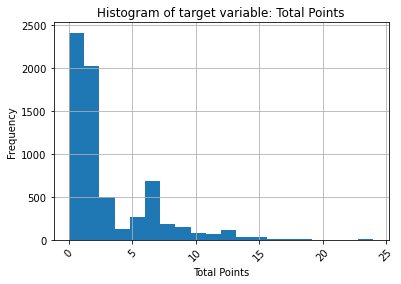

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot histogram of total points
df.hist(column='total_points', bins=20, xrot=45)
plt.title('Histogram of target variable: Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

Small range of target variables. Do not requre transformation

Reveiw variables with highest correlation to target variable.

In [3]:
# calculate overall correlations within the dataset
df_corr = df.corr(method="pearson")

# select target variable and order by highest correlation
df_corr.loc['total_points'].sort_values(ascending=False).head(10)

total_points        1.000000
rolling_xGChain     0.190219
cum_xGChain         0.184341
rolling_shots       0.164257
cum_xG              0.163102
cum_goals_scored    0.159151
cum_clean_sheets    0.158091
rolling_xG          0.155787
attack_overall      0.153310
rolling_xA          0.150450
Name: total_points, dtype: float64

Interestingly the rolling & cum xGChain are the highest correlated variables which suggests the players that are overall involved with most plays are typically the highest scorers which fits the underlying concept. The cum shots/xG/goals/cleans sheets is also important and makes intuitive sense given they are the highest returns points wise.

*Split data*

As we're using the model to predict future expected points I will create the test set from the final 5 games of the season. This is equivalent to approx 20% of the dataset

In [4]:
# update round dtype
df['round'] = df['round'].astype(object)

# create test/train datasets
test_df = df[df['round'].isin([34, 35, 36, 37, 38])]
train_df = df[~df['round'].isin([34, 35, 36, 37, 38])]

print(train_df.shape)
print(test_df.shape)

(5334, 128)
(1354, 128)


*Baseline Model*

The baseline model used to judge initial performance will be the the mean absolute error of the training data mean.

In [5]:
# import MAE calc
from sklearn.metrics import mean_absolute_error as MAE

# calculate mean of target variable within training data
train_mean = np.mean(train_df['total_points'].values)
   
# calculate baseline absolute error 
baseline_mae = MAE((test_df['total_points'].values), np.full(len(test_df), train_mean).tolist())

# print error amount
print("MAE mean baseline {}".format(baseline_mae))

MAE mean baseline 2.324124550900857


The baseline model returns an average error of ~2.32 points. This will be used as the benchmark performance going foward to compare model performance.

We now ned to define X/y values for training & test datasets.

In [6]:
# define train values required for model (all numerical columns minus target)
X_tr = train_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
y_tr = train_df['total_points'].values

# define test values required for model
X_te = test_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
y_te = test_df['total_points'].values

*Linear Regression*

First model I will be running is a linear regression.

In [7]:
# import library plus r2 score for an additional performance measure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the estimator
lr = LinearRegression()

# Fit it to train data
lr.fit(X_tr, y_tr)

# fit linear regressor & compute predictions from test data
y_pred_lr = lr.predict(X_te)

# print two performance metrics
print("MAE linear regression model {}".format(MAE(y_te, y_pred_lr)))
print("R squared linear regression model {}".format(r2_score(y_te, y_pred_lr)))

MAE linear regression model 2.215852918197962
R squared linear regression model 0.07847972516034774


Linear regression model demonstrates a healthy improvement on absolute error terms but an r squared score of 7.5% suggests model is unable to capture much of the variance within the model.

Now interested to see which variables are having the most influence on the model.

In [8]:
# create list of coefficients from the model
coef = lr.coef_

# create dataframe of the coefficients with corresponding labels and sort by importance
feature_importance = pd.DataFrame({'feature': train_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).columns, 'importance': abs(coef)})
feature_importance['importance'] = feature_importance['importance'].astype(int)
feature_importance.sort_values('importance', ascending=False, inplace=True)

# Print top 10 most important features
print(feature_importance.head(5))

           feature  importance
75  diff_xGBuildup           3
72         diff_xA           2
74    diff_xGChain           2
71         diff_xG           2
64    diff_assists           2


As we can see from the above the model is being nearly entirely directed by 5 variables all of which are only based on the one previous game. Considering this it will be worth standardizing the data and rerunning plus expectation that a regularized model may work better to reduce influece of these variables.

In [9]:
# import scaler library
from sklearn.preprocessing import StandardScaler

lr = LinearRegression()

# Standardize features only fitting the train set
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

# Fit linreg to scaled train data
lr.fit(X_tr_rescaled, y_tr)

# fit & compute predictions from test data
y_pred_lr = lr.predict(X_te_rescaled)

# calculate scores
mae_lr = MAE(y_te, y_pred_lr)
r2_lr = r2_score(y_te, y_pred_lr)

print("MAE scaled linear regression model {}".format(mae_lr))
print("R2 scaled linear regression model {}".format(r2_lr))

MAE scaled linear regression model 2.2161053807382576
R2 scaled linear regression model 0.078383196749919


Standardization has had a very small impact. As a result of this now moving on to a ridge regression where expectation is that the tuning of the alpha hyperparamater will be essential.

*Ridge Regression*

Start by running Ridge regression without tuning. This model requires standardize data and as such will now be using scaled data for remainder of modelling.

In [10]:
# import ridge library
from sklearn.linear_model import Ridge

# define model
ridge = Ridge()

# fit the Ridge object to the scaled training data
ridge.fit(X_tr_rescaled, y_tr)

# make predictions on the testing data
y_pred_ridge = ridge.predict(X_te_rescaled)

print("MAE ridge regression model {}".format(MAE(y_te, y_pred_ridge)))
print("R2 scaled regression model {}".format(r2_score(y_te, y_pred_ridge)))

MAE ridge regression model 2.2158025404391375
R2 scaled regression model 0.0785510123312344


Ridge regression has only marginally improved performance. I will now tune the model using grid search cross validation to review the alpha parameter which measures severity of regularization on the model and how it affects performance.

Gridsearch CV works through multiple splits of the dataset (5 iterations in this case) and therefore do not need to define a validation dataset to review model performance beforehand as this is being done within this.

In [11]:
# import grid search CV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {'alpha': np.logspace(-1, 4, num=20)}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

# fit to scaled dataset
grid_search.fit(X_tr_rescaled, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Print selected columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_alpha",
]
cv_results[cols].sort_values("mean_test_score", ascending=False).head(10)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_alpha
15,0.092332,0.023177,0.128480,0.006356,885.86679
14,0.091867,0.025364,0.132497,0.006497,483.293024
16,0.091384,0.020438,0.122345,0.006080,1623.776739
13,0.090670,0.027006,0.135012,0.006560,263.66509
12,0.089248,0.028197,0.136554,0.006585,143.844989
17,0.088302,0.017290,0.113615,0.005619,2976.351442
11,0.087900,0.029043,0.137474,0.006596,78.475997
10,0.086761,0.029636,0.137982,0.006603,42.813324
9,0.085883,0.030042,0.138230,0.006606,23.357215
8,0.085263,0.030308,0.138335,0.006608,12.74275


The above table shows the best test score is from an alpha value of 885 which is a high level ie the model benefits from regularization.

Now plotting the train and validation curves to view this visually.

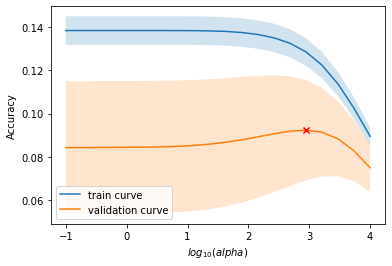

In [12]:
# create list of alpha values
alphas = np.log10(cv_results['param_alpha'].astype(float))

# plot each curve plus the point of optimal value alpha
plt.plot(alphas, cv_results["mean_train_score"], label="train curve")
plt.plot(alphas, cv_results["mean_test_score"], label="validation curve")

plt.scatter(np.log10(grid_search.best_params_['alpha']), grid_search.best_score_, marker="x", c="red", zorder=10)


# Quantify variance with ±std curves
plt.fill_between(alphas, cv_results["mean_train_score"] - cv_results["std_train_score"], cv_results["mean_train_score"] + cv_results["std_train_score"], alpha=0.2)
plt.fill_between(alphas, cv_results["mean_test_score"] - cv_results["std_test_score"], cv_results["mean_test_score"] + cv_results["std_test_score"], alpha=0.2)


plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

What the chart above shows us is that the overall model is only able to achieve 14% accuracy on the training dataset but the model is underfitting here. The highlighted orange 

As we can see from the table and chart above the optimal value of alpha to tune the model with is ~42. The variance decreases with higher alpha levels however at the cost of performance and alpha levels lower than this indicate overfitting and also hamper performance.

Now rerunning regression with this value

In [13]:
# define model with best alpha value
ridge = Ridge(grid_search.best_params_['alpha'])

# fit the Ridge object to the scaled training data
ridge.fit(X_tr_rescaled, y_tr)

# make predictions on the testing data
y_pred_ridge = ridge.predict(X_te_rescaled)

mae_ridge = MAE(y_te, y_pred_ridge)
r2_ridge = r2_score(y_te, y_pred_ridge)

print("MAE ridge regression model {}".format(mae_ridge))
print("R2 ridge regression model {}".format(r2_ridge))

MAE ridge regression model 2.2001462346766005
R2 ridge regression model 0.09487345103453504


An additional small improvement

*PCA*

Now running PCA to see if reducing dimensionality of data improves performance of the models

In [32]:
# import library
from sklearn.decomposition import PCA

# iterate over length of components in data in increments of 10 to display how many componenets are reqired to capture variance in model
pves = []
for x in range(1, 100, 10):
    pca = PCA(n_components=x)
    pca.fit(X_tr_rescaled)
    pve = pca.explained_variance_ratio_
    pve_sum = np.sum(pve)
    pves.append(pve_sum)
    
# build dataframe of this data
df = pd.DataFrame(pves)
df = df.reset_index()
df['n_components'] = 10 * df['index']
df.drop('index', axis=1, inplace=True)
df

,0,n_components
0,0.117431,0
1,0.444845,10
2,0.558749,20
3,0.653554,30
4,0.739530,40
5,0.822479,50
6,0.892959,60
7,0.940536,70
8,0.969911,80
9,0.985528,90


Table above highlights that using ~40 principal components can capture ~75% of variance within the model

In [33]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

n = np.argmax(var_cumsum >= 0.75) + 1   

n

42

In [34]:
# Create PCA transformer with the 70 componenets
pca = PCA(n_components=42) 

# Apply PCA and transform data X
X_tr_pca = pca.fit_transform(X_tr_rescaled)
X_te_pca = pca.transform(X_te_rescaled)

Rerun both nodels to see impact

In [16]:
# Fit transformed data to lr 
lr.fit(X_tr_pca, y_tr)

# create predictions
y_pred_lr_pca = lr.predict(X_te_pca)

# calculate mae


# Fit transformed data to tuned ridge
ridge.fit(X_tr_pca, y_tr)

# create preditions
y_pred_ridge_pca = ridge.predict(X_te_pca)

# calculate mae
mae_pca_lr = MAE(y_te, y_pred_lr_pca)
mae_pca_ridge = MAE(y_te, y_pred_ridge_pca)

r2_pca_lr = r2_score(y_te, y_pred_lr_pca)
r2_pca_ridge = r2_score(y_te, y_pred_ridge_pca)


print("MAE linear regression PCA model {}".format(mae_pca_lr))
print("R2 linear regression PCA model {}".format(r2_pca_lr))

print("MAE ridge regression PCA model {}".format(mae_pca_ridge))
print("R2 ridge regression PCA model {}".format(r2_pca_ridge))

MAE linear regression PCA model 2.2226286056757316
R2 linear regression PCA model 0.08267493321139063
MAE ridge regression PCA model 2.226866500549473
R2 ridge regression PCA model 0.08373666401939639


PCA has a marginally worse MAE but increased overall variance capture. The likely reason for the worse MAE is the non linear relationship between current variables and target plus also the noise of variables that have limited impact without subsetting data positionally which I will look at now.

In [17]:
data = {'mean_baseline': [baseline_mae, 0],
        'lr': [mae_lr, r2_lr],
        'lr_pca': [mae_pca_lr, r2_pca_lr],
        'ridge': [mae_ridge, r2_ridge],
        'ridge_pca': [mae_pca_ridge, r2_pca_ridge]
       }

df_results = pd.DataFrame(data, index=['mae', 'r2'])
df_results

,mean_baseline,lr,lr_pca,ridge,ridge_pca
mae,2.324125,2.216105,2.222629,2.200146,2.226867
r2,0.000000,0.078383,0.082675,0.094873,0.083737


In [18]:
df_results.to_csv("model_performance.csv")

In [19]:
data = {'lr_predictions': y_pred_lr,
       'ridge_predictions': y_pred_ridge}

df_pred = pd.DataFrame(data)

In [20]:
df_pred.to_csv("model_predictions.csv", index=False)

*Positional subsets*

I will now run the above analysis again using positional subsets. As mentioned, each position scores points in differing ways and therefore may have a different relationship overall with target variable.

The anaylsis will be two fold. Find top 20 highest correlated variables for each position and run regressions followed by doing equivalent but using PCA.

The results here are very interesting. The model has improved R2 scores for both defenders and strikers suggesting it is better able to capture the variance in the data. However, the opposite can be said with goalkeepers and forwards.

My expectation for why this is would be because the goalkeepers and forwards have a smaller dataset but also potentially because the subsets may require more or less variables than the 20 selected.

The following PCA will consider each individual subsets ideal number of principal components to capture ~90% of variance.

Using PCA targetting a 90% variance and has hindered overall performance for each subset. Overall, the performance so far suggsets that a linear and ridge regression model is unable to do a good job of modelling the dataset.

Now I will attempt a more sophisticated model that will hopefully capture the non-linearity and more complex relationships within the data more accurately.

In [21]:
mae_baseline = []

mae_posn_lr = []
r2_posn_lr = []
pred_posn_lr = []

mae_posn_ridge = []
r2_posn_ridge = []
pred_posn_ridge = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]    
    
    train_mean = np.mean(train_posn['total_points'].values)
    
    baseline_mae = MAE((test_posn['total_points'].values), np.full(len(test_posn), train_mean).tolist())
    
    mae_baseline.append(baseline_mae)
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_posn_rescaled = scaler.fit_transform(X_tr_posn)
    X_te_posn_rescaled = scaler.transform(X_te_posn)
     
    # define model
    lr = LinearRegression()

    # Fit it to train data
    lr.fit(X_tr_posn_rescaled, y_tr_posn)

    # fit linear regressor & compute predictions from validation data
    y_pred_posn_lr = lr.predict(X_te_posn_rescaled)
    pred_posn_lr.append(y_pred_posn_lr)
    
    # compute scores
    mae_lr = MAE(y_te_posn, y_pred_posn_lr)
    mae_posn_lr.append(mae_lr)
    
    r2_lr = r2_score(y_te_posn, y_pred_posn_lr)
    r2_posn_lr.append(r2_lr)
  
    # moving on to ridge model 
    
    # Define the hyperparameter grid to search over
    param_grid = {'alpha': np.logspace(-1, 4, num=20)}

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

    grid_search.fit(X_tr_posn_rescaled, y_tr_posn)
    
    # define model
    Ridge(grid_search.best_params_['alpha'])

    # fit the Ridge object to the scaled training data
    ridge.fit(X_tr_posn_rescaled, y_tr_posn)

    # make predictions on the validation data
    y_pred_ridge = ridge.predict(X_te_posn_rescaled)
    pred_posn_ridge.append(y_pred_ridge)
    
    mae_ridge = MAE(y_te_posn, y_pred_ridge)
    mae_posn_ridge.append(mae_ridge)
    
    r2_ridge = r2_score(y_te_posn, y_pred_ridge)
    r2_posn_ridge.append(r2_ridge)
    

In [22]:
mae_full_lr = []
r2_full_lr = []
pred_full_lr = []

mae_full_ridge = []
r2_full_ridge = []
pred_full_ridge = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_te_posn_rescaled = scaler.transform(X_te_posn)
     
    # define model
    lr = LinearRegression()

    # Fit it to train data
    lr.fit(X_tr_rescaled, y_tr)

    # fit linear regressor & compute predictions from validation data
    y_pred_lr = lr.predict(X_te_posn_rescaled)
    pred_full_lr.append(y_pred_lr)
    
    # compute scores
    mae_lr = MAE(y_te_posn, y_pred_lr)
    mae_full_lr.append(mae_lr)
    
    r2_lr = r2_score(y_te_posn, y_pred_lr)
    r2_full_lr.append(r2_lr)
  
    # moving on to ridge model 
    
    # Define the hyperparameter grid to search over
    param_grid = {'alpha': np.logspace(-1, 4, num=20)}

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

    grid_search.fit(X_tr_rescaled, y_tr)
    
    # define model
    Ridge(grid_search.best_params_['alpha'])

    # fit the Ridge object to the scaled training data
    ridge.fit(X_tr_rescaled, y_tr)

    # make predictions on the validation data
    y_pred_ridge = ridge.predict(X_te_posn_rescaled)
    pred_full_ridge.append(y_pred_ridge)
    
    mae_ridge = MAE(y_te_posn, y_pred_ridge)
    mae_full_ridge.append(mae_ridge)
    
    r2_ridge = r2_score(y_te_posn, y_pred_ridge)
    r2_full_ridge.append(r2_ridge)
    

Position with PCA

In [23]:
mae_pca_posn_lr = []
r2_pca_posn_lr = []
pred_pca_posn_lr = []

mae_pca_posn_ridge = []
r2_pca_posn_ridge = []
pred_pca_posn_ridge = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_posn_rescaled = scaler.fit_transform(X_tr_posn)
    X_te_posn_rescaled = scaler.transform(X_te_posn)
      
    # define pca with unlimited components
    pca = PCA(n_components=None)

    # Fit PCA to the data
    pca.fit(X_tr_posn_rescaled)

    # create cumulative sum of explained variance
    var_cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # define n as where 90% of variance is captured
    n = np.argmax(var_cumsum >= 0.75) + 1   
    
    # Create PCA transformer with defined n
    pca = PCA(n_components=n) 

    # Apply PCA and transform data X
    X_tr_pca = pca.fit_transform(X_tr_posn_rescaled)
    X_te_pca = pca.transform(X_te_posn_rescaled)
    
    # define model
    lr = LinearRegression()

    # Fit it to train data
    lr.fit(X_tr_pca, y_tr_posn)

    # fit linear regressor & compute predictions from validation data
    y_pred_lr = lr.predict(X_te_pca)
    pred_pca_posn_lr.append(y_pred_lr)
    
    # compute scores
    mae_lr = MAE(y_te_posn, y_pred_lr)
    mae_pca_posn_lr.append(mae_lr)
    
    r2_lr = r2_score(y_te_posn, y_pred_lr)
    r2_pca_posn_lr.append(r2_lr)
    
    # moving on to ridge model 
    
    # Define the hyperparameter grid to search over
    param_grid = {'alpha': np.logspace(-1, 4, num=20)}

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

    grid_search.fit(X_tr_pca, y_tr_posn)
    
    # define model
    Ridge(grid_search.best_params_['alpha'])

    # fit the Ridge object to the scaled training data
    ridge.fit(X_tr_pca, y_tr_posn)

    # make predictions on the validation data
    y_pred_ridge = ridge.predict(X_te_pca)
    pred_pca_posn_ridge.append(y_pred_ridge)
    
    mae_ridge = MAE(y_te_posn, y_pred_ridge)
    mae_pca_posn_ridge.append(mae_ridge)
    
    r2_ridge = r2_score(y_te_posn, y_pred_ridge)
    r2_pca_posn_ridge.append(r2_ridge)
    

In [24]:
mae_pca_lr = []
r2_pca_lr = []
pred_pca_lr = []

mae_pca_ridge = []
r2_pca_ridge = []
pred_pca_ridge = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_te_posn_rescaled = scaler.transform(X_te_posn)
      
    # Create PCA transformer with defined n
    pca = PCA(n_components=42) 

    # Apply PCA and transform data X
    X_tr_pca = pca.fit_transform(X_tr_rescaled)
    X_te_pca = pca.transform(X_te_posn_rescaled)
    
    # define model
    lr = LinearRegression()

    # Fit it to train data
    lr.fit(X_tr_pca, y_tr)

    # fit linear regressor & compute predictions from validation data
    y_pred_lr = lr.predict(X_te_pca)
    pred_pca_lr.append(y_pred_lr)
    
    # compute scores
    mae_lr = MAE(y_te_posn, y_pred_lr)
    mae_pca_lr.append(mae_lr)
    
    r2_lr = r2_score(y_te_posn, y_pred_lr)
    r2_pca_lr.append(r2_lr)
    
    # moving on to ridge model 
    
    # Define the hyperparameter grid to search over
    param_grid = {'alpha': np.logspace(-1, 4, num=20)}

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

    grid_search.fit(X_tr_pca, y_tr)
    
    # define model
    Ridge(grid_search.best_params_['alpha'])

    # fit the Ridge object to the scaled training data
    ridge.fit(X_tr_pca, y_tr)

    # make predictions on the validation data
    y_pred_ridge = ridge.predict(X_te_pca)
    pred_pca_ridge.append(y_pred_ridge)
    
    mae_ridge = MAE(y_te_posn, y_pred_ridge)
    mae_pca_ridge.append(mae_ridge)
    
    r2_ridge = r2_score(y_te_posn, y_pred_ridge)
    r2_pca_ridge.append(r2_ridge)
    

Best results from tuned ridge regression fitted to entire database used to predict positional test database

In [35]:
defenders = {'baseline_posn': [mae_baseline[0], 0],
        'lr_posn': [mae_posn_lr[0], r2_posn_lr[0]],
        'lr_pca_posn': [mae_pca_posn_lr[0], r2_pca_posn_lr[0]],
        'lr_full': [mae_full_lr[0], r2_full_lr[0]],
        'lr_pca_full': [mae_pca_lr[0], r2_pca_lr[0]],
        'ridge_posn': [mae_posn_ridge[0], r2_posn_ridge[0]],
        'ridge_pca_posn': [mae_pca_posn_ridge[0], r2_pca_posn_ridge[0]],
        'ridge_full': [mae_full_ridge[0], r2_full_ridge[0]],
        'ridge_pca_full': [mae_pca_ridge[0], r2_pca_ridge[0]]
       }

df_def_results = pd.DataFrame(defenders, index=['mae', 'r2'])
df_def_results

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.597269,2.397589,2.366395,2.409082,2.37579,2.363104,2.401791,2.384484,2.381736
r2,0.000000,0.010739,0.076570,0.074157,0.09252,0.089165,0.083971,0.096495,0.091766


In [38]:
df_def_results.to_csv("def_model_performance.csv")

In [36]:
midfielders = {'baseline_posn': [mae_baseline[1], 0],
        'lr_posn': [mae_posn_lr[1], r2_posn_lr[1]],
        'lr_pca_posn': [mae_pca_posn_lr[1], r2_pca_posn_lr[1]],
        'lr_full': [mae_full_lr[1], r2_full_lr[1]],
        'lr_pca_full': [mae_pca_lr[1], r2_pca_lr[1]],
        'ridge_posn': [mae_posn_ridge[1], r2_posn_ridge[1]],
        'ridge_pca_posn': [mae_pca_posn_ridge[1], r2_pca_posn_ridge[1]],
        'ridge_full': [mae_full_ridge[1], r2_full_ridge[1]],
        'ridge_pca_full': [mae_pca_ridge[1], r2_pca_ridge[1]]
       }

df_mid_results = pd.DataFrame(midfielders, index=['mae', 'r2'])
df_mid_results

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.051065,2.079360,1.996236,2.038427,2.018140,1.997379,1.999223,2.010944,2.021215
r2,0.000000,0.032494,0.083804,0.065347,0.081456,0.080792,0.088127,0.084514,0.083435


In [39]:
df_mid_results.to_csv("mid_model_performance.csv")

In [37]:
forwards = {'baseline_posn': [mae_baseline[2], 0],
        'lr_posn': [mae_posn_lr[2], r2_posn_lr[2]],
        'lr_pca_posn': [mae_pca_posn_lr[2], r2_pca_posn_lr[2]],
        'lr_full': [mae_full_lr[2], r2_full_lr[2]],
        'lr_pca_full': [mae_pca_lr[2], r2_pca_lr[2]],
        'ridge_posn': [mae_posn_ridge[2], r2_posn_ridge[2]],
        'ridge_pca_posn': [mae_pca_posn_ridge[2], r2_pca_posn_ridge[2]],
        'ridge_full': [mae_full_ridge[2], r2_full_ridge[2]],
        'ridge_pca_full': [mae_pca_ridge[2], r2_pca_ridge[2]]
       }

df_fwd_results = pd.DataFrame(forwards, index=['mae', 'r2'])
df_fwd_results

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.537234,2.614176,2.445224,2.323224,2.462848,2.439876,2.472146,2.368729,2.475169
r2,0.000000,-0.077798,0.060748,0.111648,0.096280,0.058855,0.058272,0.109896,0.093536


In [40]:
df_fwd_results.to_csv("fwd_model_performance.csv")